In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/2023년_카이스트_금융시계열/1주차실습/1. 금융시계열 실습')

In [ ]:
# ARIMA 모형을 임의로 생성하고, 향후 데이터를 예측한다.

In [3]:
import warnings
warnings.filterwarnings('ignore')
# --------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA, checkNormality
from statsmodels.tsa.arima.model import ARIMA

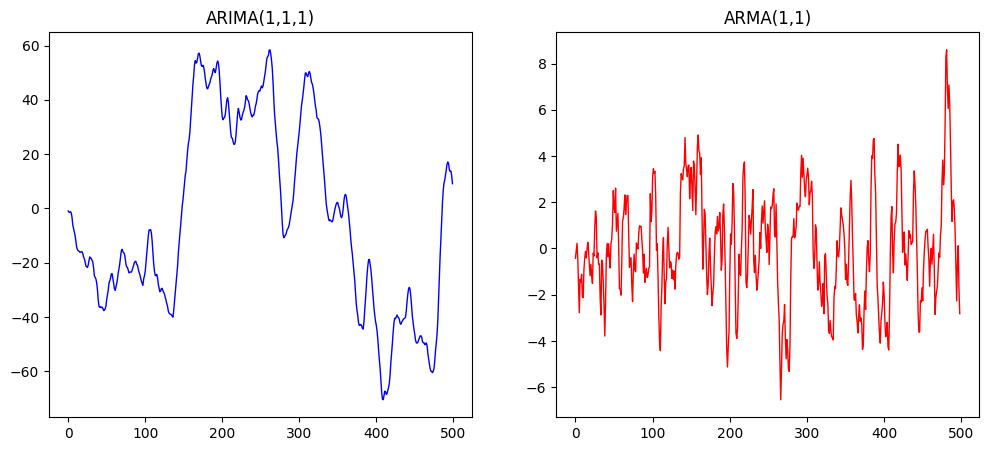

In [4]:
# ARIMA(1,1,1) 샘플을 생성한다
y = sampleARIMA(ar=[0.8], d=1, ma=[0.5], n=500)
d = np.diff(y) # 차분하면 ARMA(1,1)이 된다

# ARIMA 시계열과 차분 시계열을 그린다
fig = plt.figure(figsize=(12, 5))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)
p1.plot(y, color='blue', linewidth=1)
p2.plot(d, color='red', linewidth=1)
p1.set_title("ARIMA(1,1,1)")
p2.set_title("ARMA(1,1)")
plt.show()

In [5]:
# 샘플링 데이터를 ARIMA(1,1,1) 모형으로 분석한다 (Fitting)
y = sampleARIMA(ar=[0.8], d=1, ma=[0.5], n=500)
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -706.304
Date:                Tue, 24 Oct 2023   AIC                           1418.609
Time:                        04:19:44   BIC                           1431.246
Sample:                             0   HQIC                          1423.568
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8128      0.030     26.998      0.000       0.754       0.872
ma.L1          0.5251      0.043     12.127      0.000       0.440       0.610
sigma2         0.9888      0.066     15.024      0.0


Shapiro-Wilks 검정 : 검정통계량 = 0.9978, p-value = 0.7709


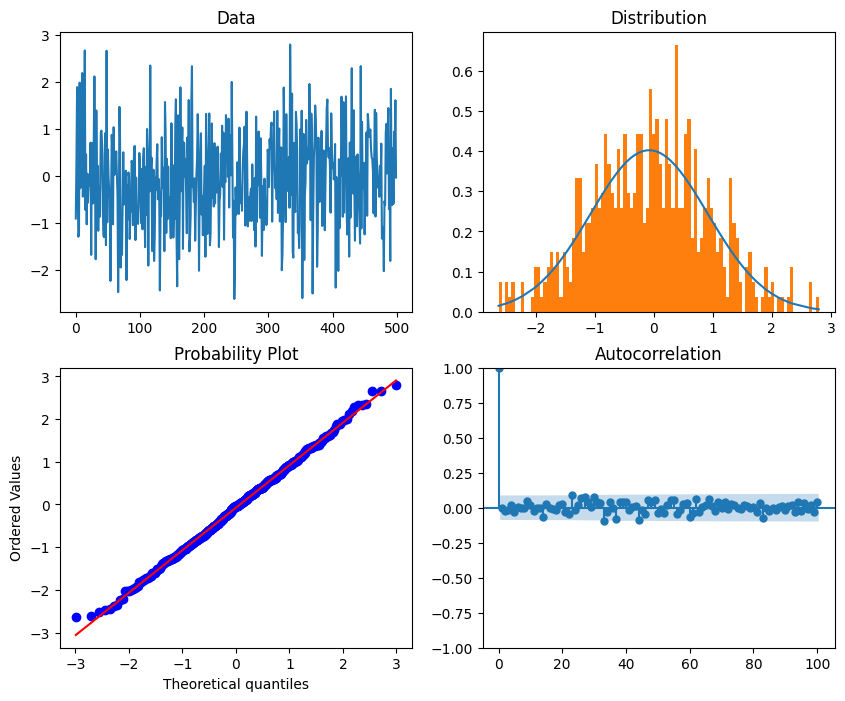

In [6]:
# Fitting이 잘되었는지 확인하기 위해 Residual을 분석한다.
# Residual은 실제 데이터와 추정치의 차이이므로 백색 잡음 (잔차) 이어야 한다.
# 따라서 Residual은 정규분포 특성을 가져야한다. 정규분포 특성을 조사하면
# Fitting이 잘되었는지 확인할 수 있다.
residual = model_fit.resid
checkNormality(residual)  # 육안으로 백색 잡음 형태인지 확인한다

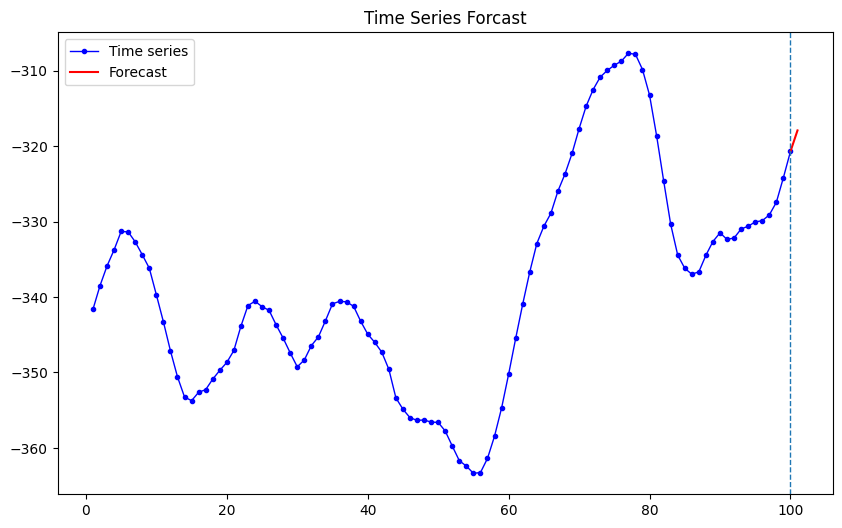

In [7]:
# 향후 10 기간 데이터를 예측한다
forecast = model_fit.forecast(steps=10)[0]
forecast = np.r_[y[-1], forecast]  # y의 마지막 값을 forecast 앞 부분에 넣는다

# 원 시계열과 예측된 시계열을 그린다
ytail = y[len(y)-100:]   # 뒷 부분 100개만 그린다
ax1 = np.arange(1, len(ytail) + 1)
ax2 = np.arange(len(ytail), len(ytail) + len(forecast))
plt.figure(figsize=(10, 6))
plt.plot(ax1, ytail, 'b-o', markersize=3, color='blue', label='Time series', linewidth=1)
plt.plot(ax2, forecast, color='red', label='Forecast')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.title("Time Series Forcast")
plt.legend()
plt.show()